# Homework #3  Penguin Size Analysis

#### Serena Ban (banseri)
#### Collaborator: Seo Won Yi (yiseo)

In [ ]:
# import modules

import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

# load the data from github

url = "https://raw.githubusercontent.com/serihalf/STA365-Applied-Bayesian/main/HW3/data/penguins_size.csv"

# read the data

df = pd.read_csv(url)

df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# observe what column variables are available

print(list(df))

# observe unique values in each column

for col in list(df):
  print(df[col].unique())
  print("\n")

['species', 'island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
['Adelie' 'Chinstrap' 'Gentoo']


['Torgersen' 'Biscoe' 'Dream']


[39.1 39.5 40.3  nan 36.7 39.3 38.9 39.2 34.1 42.  37.8 41.1 38.6 34.6
 36.6 38.7 42.5 34.4 46.  37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2
 40.9 36.4 42.2 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 37.5 42.3 40.1
 35.  34.5 41.4 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2
 42.1 42.9 35.1 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7
 40.2 35.2 41.5 38.5 43.1 36.8 35.6 32.1 40.7 46.5 50.  51.3 45.4 52.7
 45.2 46.1 46.6 51.7 47.  52.  45.9 50.5 50.3 58.  46.4 49.2 42.4 48.5
 50.6 46.7 49.5 52.8 54.2 51.  49.7 47.5 47.6 46.9 53.5 49.  46.2 50.9
 45.5 50.8 50.1 51.5 49.8 48.1 51.4 45.7 50.7 52.2 49.3 50.2 51.9 46.8
 55.8 43.5 49.6 48.7 43.3 48.4 45.1 46.3 44.5 47.8 48.2 47.3 59.6 49.1
 42.6 44.4 44.  45.3 43.6 44.9 45.  43.8 50.4 54.3 47.7 48.6 51.1 52.5
 47.4 43.4 52.1 49.4 55.9 47.2 41.7 53.4 55.1 48

In [ ]:
# check statistical summary

print(df.describe())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [ ]:
# count missing data in each column

df.isna().sum()


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
# from above, we see that there are approximately 3% missing values
# we'll be using Complete Case Analysis (CCA)
df_final = df.dropna(axis=0, inplace=False)
print(df_final)

    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         37

<ipython-input-101-91f7b12e75f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["body_mass_g"] = df_final["body_mass_g"] / 1000


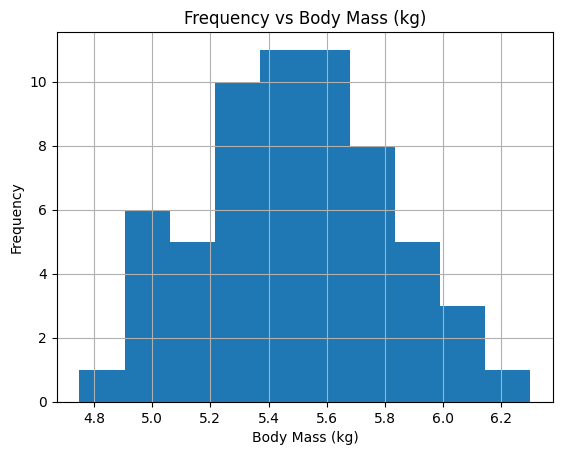

In [ ]:
# we'll be analyzing body mass of Male Gentoo penguins
# we will convert the unit of body mass to simplify the analysis on parameters

df_final["body_mass_g"] = df_final["body_mass_g"] / 1000

# specify filtering conditions as below

filter = (df_final['sex'] == 'MALE') & (df_final['species'] == 'Gentoo')

# plot the graph
df_final[filter].hist(column="body_mass_g")
plt.xlabel("Body Mass (kg)")
plt.ylabel("Frequency")
plt.title("Frequency vs Body Mass (kg)")
plt.show()

Based on the above plot, the data is not perfectly following a normal distribution. However, for the purposes of this analysis, we will assume it to be normally distributed with a mean of around 5.5 and a precision of around 10.395. These values have been chosen based on a rough observation of the graph.

In the Bayesian framework, the distribution of a population can be inferred through a posterior distribution which involves likelihood, which represents the distribution of the sample data. We make the assumption that the parameters of this distribution are not fixed but instead they are estimated from their own individual distribution, referred to as the prior distribution.

With this in mind, we can make our own assumption representing our prior belief regarding the parameters. For this analysis, we will assume that the mean of the likelihood distribution of our data is drawn from a normal distribution. For the precision parameter, we will assume that it is drawn from a gamma distribution with $\alpha$ = 10 and $\beta$ = 1.0 which contains the value $1/(0.09)^2$.

We can plot two different graphs (normal and gamma distribution) using above information.


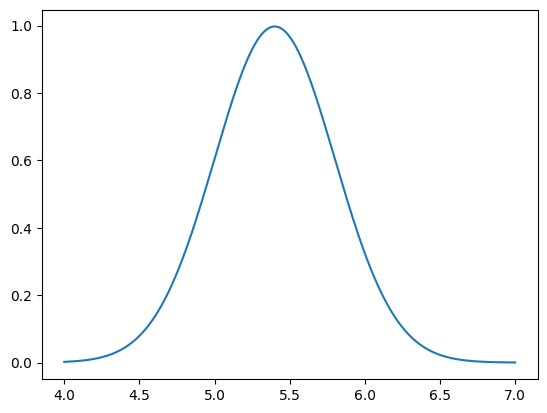

In [ ]:
# plot a prior graph of mean

x = np.linspace(4, 7, 1001)
prior_mean = stats.norm(loc=5.4, scale=0.4)

plt.plot(x, prior_mean.pdf(x))

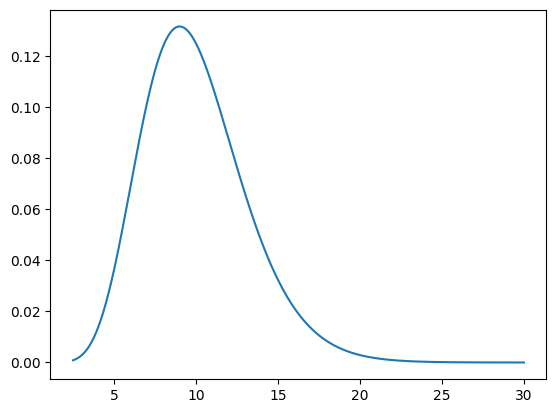

In [ ]:
# plot a prior graph of precision

x_sd = np.linspace(2.5, 30, 1001)

alpha=10
beta=1.0

prior_prec = stats.gamma(a=alpha, scale=1/beta)
plt.plot(x_sd, prior_prec.pdf(x_sd))

In [ ]:
x = df_final[filter]["body_mass_g"].tolist()

normal_gamma_model = pm.Model()

with normal_gamma_model:
  theta = pm.Normal("theta", mu=5.4, sigma=0.4)
  phi = pm.Gamma("phi", alpha=10, beta=1)
  x_obs = pm.Normal("likelihood", mu=theta, sigma=(1/phi)**(1/2), observed=x)

In [ ]:
with normal_gamma_model:
  HMC_data = pm.sample(chains=4)

Rhats {'theta': 1.0005, 'phi': 0.9998}


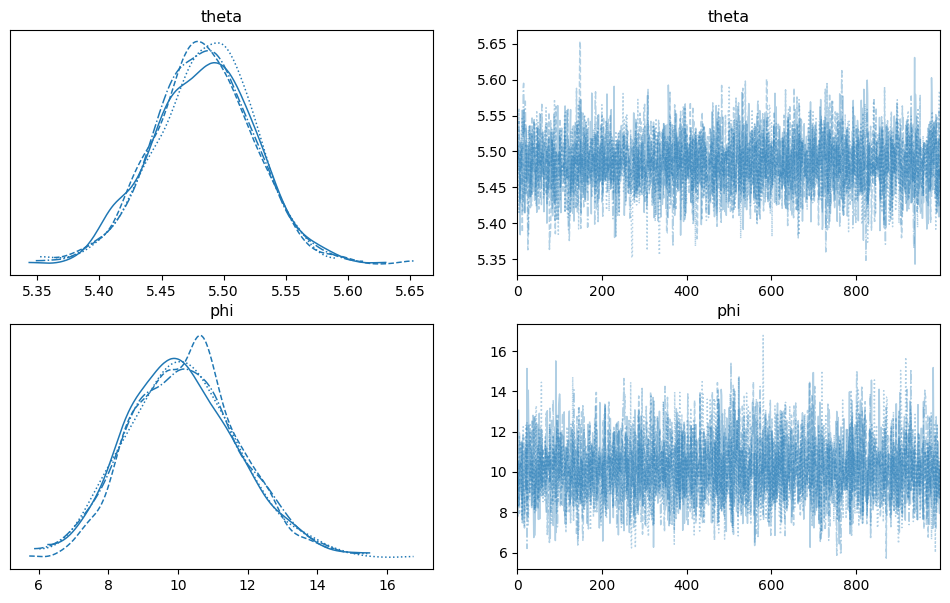

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(12, 7))
az.plot_trace(HMC_data, axes=ax[:2,:2])
print("Rhats", {k: np.round(v.values, 4) for k,v in az.rhat(HMC_data).items()})

From above, we get $\hat{\phantom{.}R}$ value that are less than 1.05. This indicates that chains successfully converged.

Text(0.5, 1.0, 'HMC')

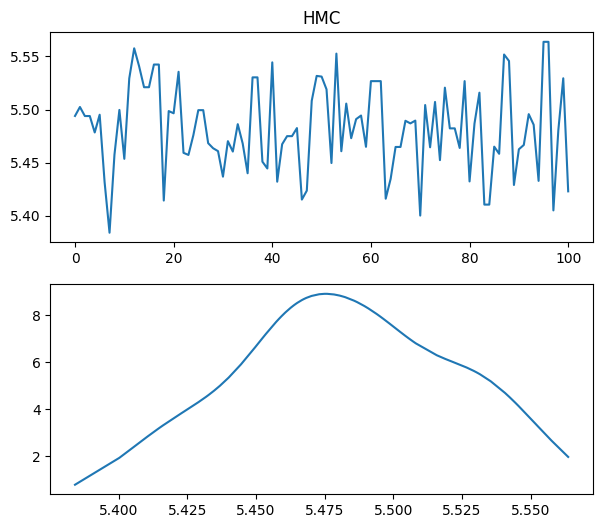

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(7,6))
n_mcmc_samples=100
mcmc_chain = HMC_data.posterior["theta"].sel(chain=0, draw=slice(0, n_mcmc_samples)).values
mcmc_chain_sorted = sorted(mcmc_chain)
ax[0].plot(mcmc_chain)
ax[1].plot(mcmc_chain_sorted, stats.gaussian_kde(mcmc_chain_sorted)(mcmc_chain_sorted))
ax[0].set_title("HMC")

Autocorrelation for HMC (MCMC) chain -0.0415247709159604


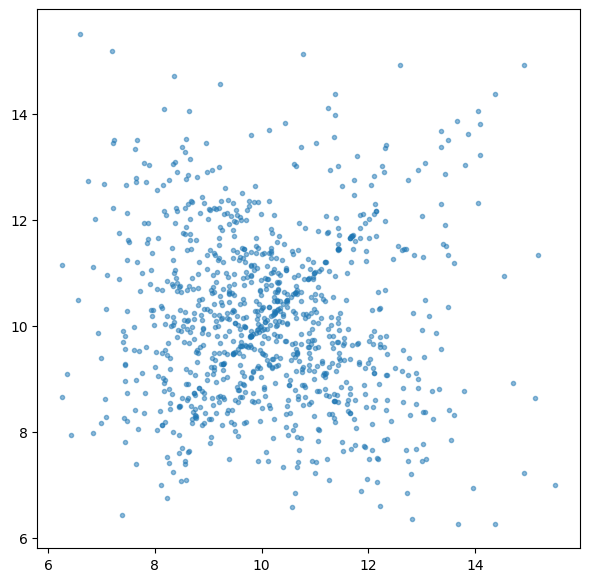

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

max_mcmc_samples = 1000

mcmc_chain = HMC_data.posterior["phi"].sel(chain=0, draw=slice(0, max_mcmc_samples-2)).values

mcmc_chain_one_step_ahead = HMC_data.posterior["phi"].sel(chain=0, draw=slice(1, max_mcmc_samples-1)).values

ax.plot(mcmc_chain, mcmc_chain_one_step_ahead, '.', alpha=0.5)
print("Autocorrelation for HMC (MCMC) chain", np.corrcoef(mcmc_chain, mcmc_chain_one_step_ahead)[0, 1])

From above, we can see that there is a negative autocorrelation for HMC.  

In [ ]:
print("number of actual samples:", HMC_data.posterior["phi"].values.flatten().shape[-1])
az.summary(HMC_data, round_to=2)

number of actual samples: 4000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,5.48,0.04,5.40,5.56,0.00,0.00,3909.34,2672.32,1.0
phi,10.18,1.58,7.22,13.05,0.03,0.02,3802.73,2763.36,1.0


array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

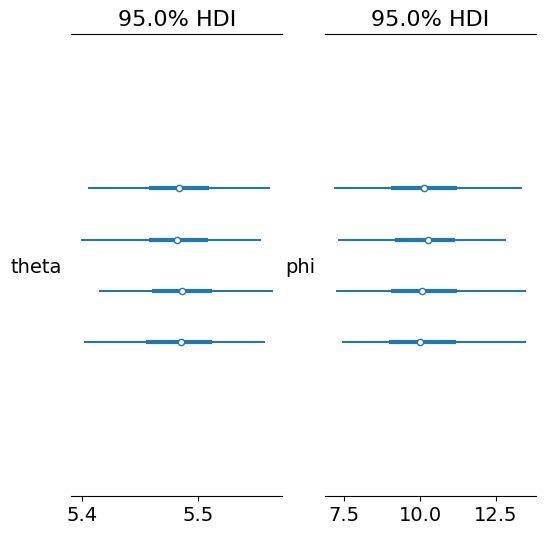

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(6,6))

az.plot_forest(HMC_data, var_names=["theta"], combined=False, hdi_prob=0.95, ax=ax[0])
az.plot_forest(HMC_data, var_names=["phi"], combined=False, hdi_prob=0.95, ax=ax[1])

We get 97\% credible interval for theta which lies between 5.40 and 5.56. For phi, we see 97\% credible interval lies between 7.22 and 13.05.

# Part 2

In the second part of this analysis, different column of data will be analyzed without using the normal-gamma specification. For this case, we will be analyzing body mass of female Gentoo penguins which its data "looks like" a gamma distribution.

For gamma distribution, the mean can be explained by $\alpha$/$\beta$ and variance can be explained by $\alpha/\beta^2$.

<ipython-input-139-1fd722901ae3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["body_mass_g"] = df_final["body_mass_g"] / 1000


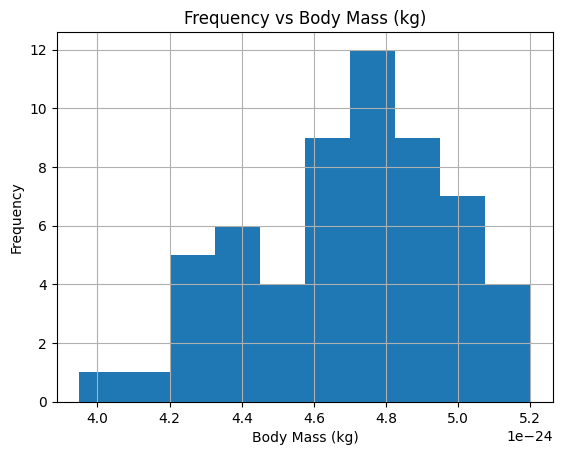

In [ ]:
# convert body mass in grams to kilograms

df_final["body_mass_g"] = df_final["body_mass_g"] / 1000

# specify filtering conditions as below

filter_two = (df_final["sex"] == "FEMALE") & (df_final["species"] == "Gentoo")

# plot the graph

df_final[filter_two].hist(column="body_mass_g")
plt.xlabel("Body Mass (kg)")
plt.ylabel("Frequency")
plt.title("Frequency vs Body Mass (kg)")
plt.show()


From above plot, mean roughly appears to be 4.7 and variance appears to be around 0.3^2. Thus, using the information of mean and variance we can calculate $\alpha$ and $\beta$ (i.e., $4.7=\alpha/\beta$ and $0.09=\alpha/\beta^2$). By solving two separate equations, one of the possible $\alpha$ is approximately 245.74 and $\beta$ is approximately 52.22. For the prior distribution's parameters (i.e., alpha and beta), we have chosen a uniform distribution (lower=0 to upper=500) for the alpha prior and a gamma distribution (alpha=10 and beta=40) which were chosen randomly to simplify this analysis.

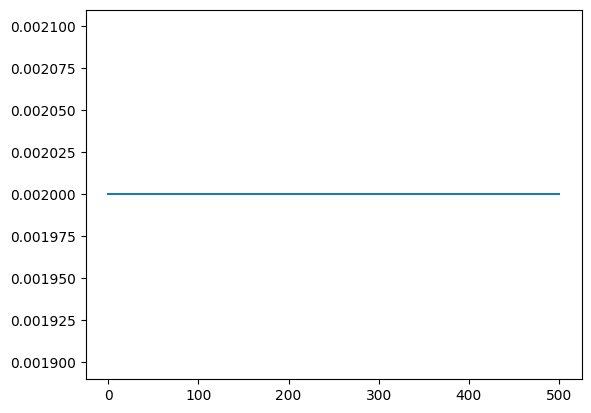

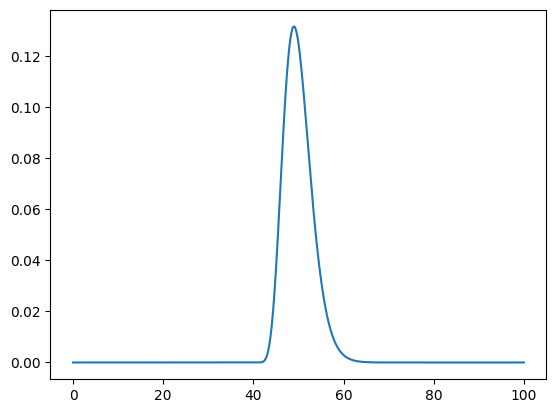

In [204]:
x_alpha = np.linspace(0, 500, 1001)
prior_alpha = stats.uniform(0, 500)
plt.plot(x_alpha, prior_alpha.pdf(x_alpha))
plt.show()

x_gamma = np.linspace(0, 100, 1001)
prior_gamma = stats.gamma(10, 40)
plt.plot(x_gamma, prior_gamma.pdf(x_gamma))
plt.show()

In [206]:
x_data = df_final[filter_two]["body_mass_g"].tolist()

gamma_uniform_model = pm.Model()

with gamma_uniform_model:
  alpha = pm.Uniform("alpha", lower=0, upper=10)
  beta = pm.Gamma("beta", alpha=10, beta=40)
  x_obs = pm.Gamma("likelihood", alpha=alpha, beta=beta, observed=x_data)

In [207]:
with gamma_uniform_model:
  HMC_data = pm.sample(chains=4)

Rhats {'alpha': 1.0004, 'beta': 1.0016}


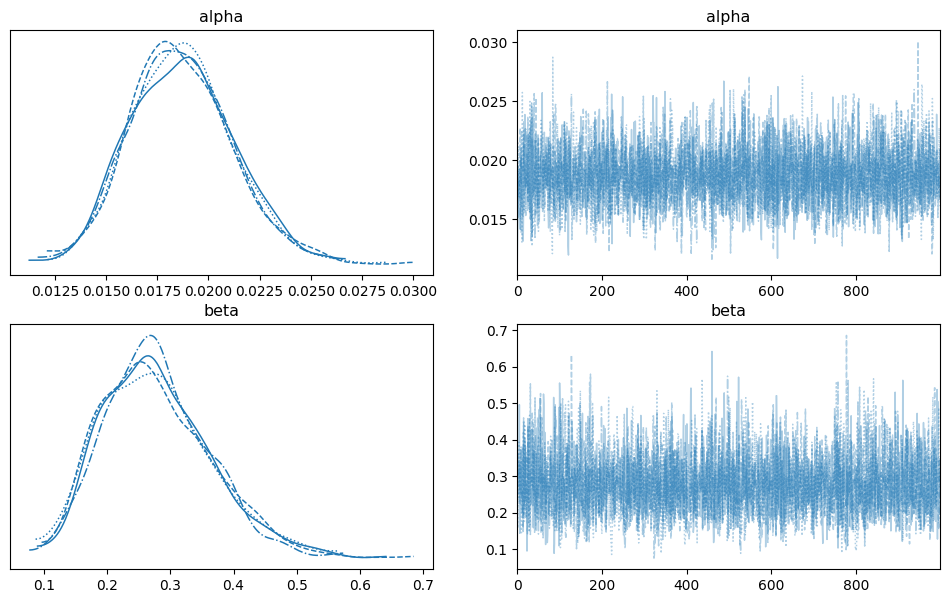

In [208]:
f, ax = plt.subplots(2, 2, figsize=(12, 7))
az.plot_trace(HMC_data, axes=ax[:2,:2])
print("Rhats", {k: np.round(v.values, 4) for k,v in az.rhat(HMC_data).items()})

Text(0.5, 1.0, 'HMC')

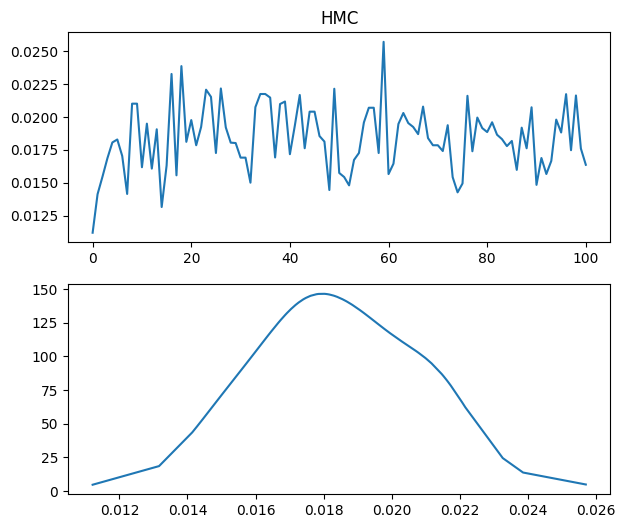

In [209]:
fig, ax = plt.subplots(2,1, figsize=(7,6))
n_mcmc_samples=100
mcmc_chain = HMC_data.posterior["alpha"].sel(chain=0, draw=slice(0, n_mcmc_samples)).values
mcmc_chain_sorted = sorted(mcmc_chain)
ax[0].plot(mcmc_chain)
ax[1].plot(mcmc_chain_sorted, stats.gaussian_kde(mcmc_chain_sorted)(mcmc_chain_sorted))
ax[0].set_title("HMC")

Autocorrelation for HMC (MCMC) chain -0.008654719798851799


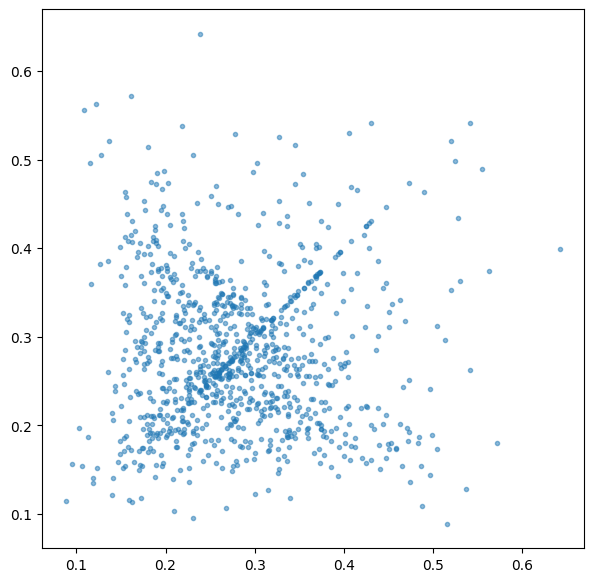

In [210]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

max_mcmc_samples = 1000

mcmc_chain = HMC_data.posterior["beta"].sel(chain=0, draw=slice(0, max_mcmc_samples-2)).values

mcmc_chain_one_step_ahead = HMC_data.posterior["beta"].sel(chain=0, draw=slice(1, max_mcmc_samples-1)).values

ax.plot(mcmc_chain, mcmc_chain_one_step_ahead, '.', alpha=0.5)
print("Autocorrelation for HMC (MCMC) chain", np.corrcoef(mcmc_chain, mcmc_chain_one_step_ahead)[0, 1])

From above, we see a negative autocorrelation for HMC.  

In [211]:
print("number of actual samples:", HMC_data.posterior["beta"].values.flatten().shape[-1])
az.summary(HMC_data, round_to=4)

number of actual samples: 4000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.0187,0.0025,0.0142,0.0234,0.0000,0.000,4482.9112,3163.3723,1.0004
beta,0.2779,0.0857,0.1341,0.4439,0.0014,0.001,3614.2758,2625.7427,1.0016


array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

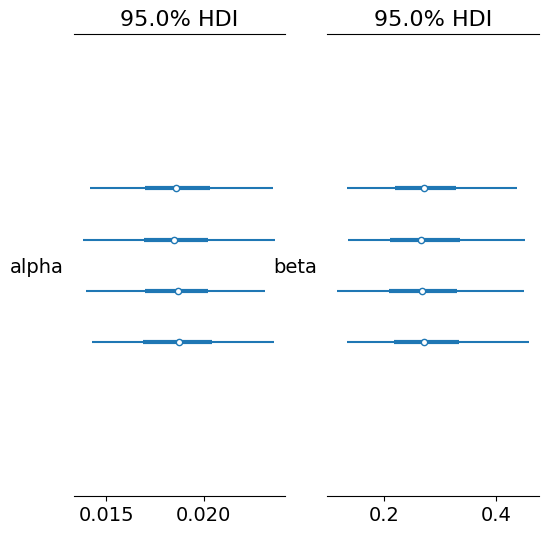

In [212]:
fig, ax = plt.subplots(1,2, figsize=(6,6))

az.plot_forest(HMC_data, var_names=["alpha"], combined=False, hdi_prob=0.95, ax=ax[0])
az.plot_forest(HMC_data, var_names=["beta"], combined=False, hdi_prob=0.95, ax=ax[1])

As a result, we see get 97\% credible interval for alpha which lies between 0.0142 and 0.0234. For beta, we see 97\% credible interval lies between 0.1341 and 0.4439.